In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 16 11:18:55 2022

@author: abd_i
"""
#import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# for statistics calculations
import math


#get DataSet
fruits = pd.read_csv("H:\\Education\College\\04 Final year\\AI 2\\ML\\Lab 02\\Python File\\fruit_data_with_colours.csv")

fruits.head()

Fruit_name =  dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique() ))

print(type(Fruit_name))
print(Fruit_name)

#get independent_variable (Features)
X = fruits[['mass','width','height']]
X.head(10)

#get dependent_variable (Response)
y= fruits['fruit_label']
y.head(10)


#Split data 
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42)


#Classifier using KNN

from sklearn.neighbors import KNeighborsClassifier

### added
# accuracy method of KNN
# take (test_label, predicted_values)
from sklearn.metrics import accuracy_score

### added
accs = []
for i in range(1, 16):
    
    knn = KNeighborsClassifier(n_neighbors=i)

    #train_data

    knn.fit(X_train,y_train)

    #test_data

    knn.score(X_test,y_test)

    #Get predicted response 
    y_predict = knn.predict(X_test)

    ### added
    acc = accuracy_score(y_test, y_predict)
    accs.append(acc)
    print(f"Accuracy of {i} = {acc}")

    # sample = knn.predict([[120,5.3,8.5]])

    # sample_name_predicted = Fruit_name[sample[0]]

    # print(sample_name_predicted)

print() # new line
print(f"Max accuracy is in k = {accs.index(max(accs)) + 1}")
print() # new line


# summition of x*p(x) 
## we will assume that expectation = mean
def expectation(data):
    return sum(data) / len(data)

# (standard deviation)^2 = V(X) = E(X^2) - E(X)^2
def variance(data): # column
    x_sqrd = [i ** 2 for i in data]
    
    exp_of_x_sqrd = expectation(x_sqrd)
    
    exp_of_x = expectation(data)
    
    #! E(X^2) - E(X)^2
    return  exp_of_x_sqrd - (exp_of_x ** 2)

# sqrt(V(X))
def standard_deviation(data):
    return math.sqrt(variance(data))

# e^-0.5((x-exp)/std) / (std*sqrt(2*pi))
def standard_normal_distribution(data):
    std = standard_deviation(data)
    exp = expectation(data)
    var = variance(data)
    constant = ( std * math.sqrt(2 * math.pi) ) ** -1
    
    return [constant * math.e ** -((x-exp) ** 2 / (2*var)) for x in data]

<class 'dict'>
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
Accuracy of 1 = 0.5333333333333333
Accuracy of 2 = 0.5333333333333333
Accuracy of 3 = 0.6
Accuracy of 4 = 0.5333333333333333
Accuracy of 5 = 0.5333333333333333
Accuracy of 6 = 0.6666666666666666
Accuracy of 7 = 0.6
Accuracy of 8 = 0.5333333333333333
Accuracy of 9 = 0.5333333333333333
Accuracy of 10 = 0.5333333333333333
Accuracy of 11 = 0.4666666666666667
Accuracy of 12 = 0.4666666666666667
Accuracy of 13 = 0.4666666666666667
Accuracy of 14 = 0.4666666666666667
Accuracy of 15 = 0.4

Max accuracy is in k = 6



In [3]:
standard_deviation([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

2.399999999999999

In [4]:
variance([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

5.7599999999999945

In [5]:
expectation([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

5.2

In [6]:
data = [4, 8, 6, 5, 3, 2, 8, 9, 2, 5]

In [7]:
expectation([i**2 for i in data])

32.8

In [8]:
32.8 - 5.2**2

5.7599999999999945

In [9]:
standard_deviation([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

2.399999999999999

In [10]:
X.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [11]:
X['mass']

0     192
1     180
2     176
3      86
4      84
5      80
6      80
7      76
8     178
9     172
10    166
11    172
12    154
13    164
14    152
15    156
16    156
17    168
18    162
19    162
20    160
21    156
22    140
23    170
24    342
25    356
26    362
27    204
28    140
29    160
30    158
31    210
32    164
33    190
34    142
35    150
36    160
37    154
38    158
39    144
40    154
41    180
42    154
43    194
44    200
45    186
46    216
47    196
48    174
49    132
50    130
51    116
52    118
53    120
54    116
55    116
56    116
57    152
58    118
Name: mass, dtype: int64

In [12]:
mstd = standard_deviation(X['mass'])

In [13]:
mstd

54.55057822426929

In [14]:
def standard_normal_distribution(data):
    std = standard_deviation(data)
    exp = expectation(data)
    constant = ( std * math.sqrt(2 * math.pi) ) ** -1
    return [constant * math.e ** (-0.5 * ((x-exp) / std) ** 2) for x in data]

In [15]:
standard_normal_distribution(sorted(X['mass']))

[0.002043050035963475,
 0.00229070492792853,
 0.00229070492792853,
 0.00255460758152175,
 0.002692316156257591,
 0.0050361766096711814,
 0.0050361766096711814,
 0.0050361766096711814,
 0.0050361766096711814,
 0.005194723188608118,
 0.005194723188608118,
 0.005351063364997319,
 0.006082356679366236,
 0.006215082773630536,
 0.006685121375048562,
 0.006685121375048562,
 0.006785243752417669,
 0.006877614602315123,
 0.007104807753585192,
 0.007162911947595167,
 0.007162911947595167,
 0.007211790777506568,
 0.007211790777506568,
 0.007211790777506568,
 0.007211790777506568,
 0.00725124952574756,
 0.00725124952574756,
 0.00725124952574756,
 0.00728113035207384,
 0.00728113035207384,
 0.00730131334538101,
 0.00730131334538101,
 0.00730131334538101,
 0.007311717325342378,
 0.007311717325342378,
 0.007312300386372758,
 0.007312300386372758,
 0.007303060178817657,
 0.007284033924727506,
 0.007255298168068747,
 0.00721696826171752,
 0.00721696826171752,
 0.007169197596047301,
 0.00711217657632948

In [16]:
standard_deviation(X['mass'])

54.55057822426929

In [17]:
expectation(X['mass'])

163.11864406779662

In [18]:
Ys = standard_normal_distribution(X['mass'])
Xs = X['mass']

In [19]:
fig = plt.figure(figsize = (14, 8))

<Figure size 1400x800 with 0 Axes>

Text(0, 0.5, 'Frequency')

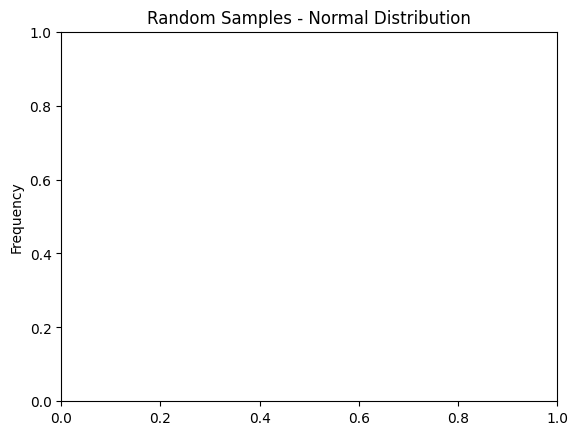

In [20]:
plt.title('Random Samples - Normal Distribution')
 
# Add X and y Label
plt.ylabel('X-axis')
plt.ylabel('Frequency')

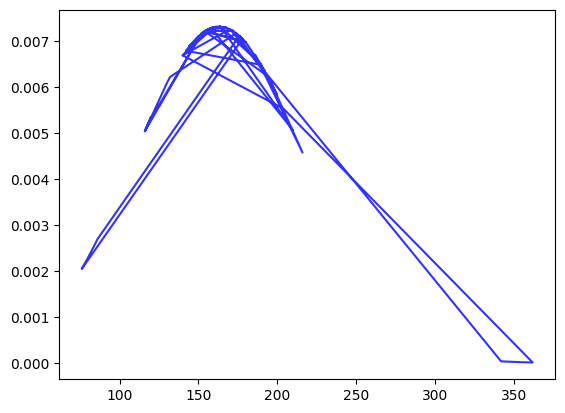

In [21]:
plt.plot(Xs, Ys, 'b', alpha = 0.8)

In [22]:
def standard_normal_distribution(data): # reformating
    std = standard_deviation(data)
    exp = expectation(data)
    var = variance(data)
    constant = ( std * math.sqrt(2 * math.pi) ) ** -1
    return [constant * math.e ** (-( (x-exp) ** 2 ) / var) for x in data]

In [23]:
standard_normal_distribution(X['mass'])

[0.005525533598852976,
 0.006645376978942502,
 0.006916626965281727,
 0.000991154614545272,
 0.0008923550505805535,
 0.0007175093961985935,
 0.0007175093961985935,
 0.0005707518114585506,
 0.006788764809254007,
 0.007121949392836871,
 0.007292879725716732,
 0.007121949392836871,
 0.00711173442375535,
 0.007311346054049239,
 0.007015659739557186,
 0.007189769919352929,
 0.007189769919352929,
 0.0072549297616037395,
 0.007310180130665187,
 0.007310180130665187,
 0.00728939134625504,
 0.007189769919352929,
 0.006110938119475047,
 0.007197800792635242,
 1.5635898923002155e-07,
 2.7197718289230248e-08,
 1.2344698336105986e-08,
 0.004170585379538012,
 0.006110938119475047,
 0.00728939134625504,
 0.007249146972189634,
 0.0034941897405383194,
 0.007311346054049239,
 0.005736548452473523,
 0.006295354635718051,
 0.006902301956823684,
 0.00728939134625504,
 0.00711173442375535,
 0.007249146972189634,
 0.006467924833981797,
 0.00711173442375535,
 0.006645376978942502,
 0.00711173442375535,
 0.005

In [24]:
def standard_normal_distribution(data):
    std = standard_deviation(data)
    exp = expectation(data)
    var = variance(data)
    constant = ( std * math.sqrt(2 * math.pi) ) ** -1
    return [constant * math.e ** -((x-exp) ** 2 / (2*var)) for x in data]

In [25]:
standard_normal_distribution(X['mass'])

[0.006356857348833917,
 0.006971322354945257,
 0.007112176576329487,
 0.002692316156257591,
 0.0025546075815217496,
 0.00229070492792853,
 0.00229070492792853,
 0.0020430500359634755,
 0.0070461313584867305,
 0.00721696826171752,
 0.007303060178817657,
 0.00721696826171752,
 0.007211790777506568,
 0.007312300386372758,
 0.007162911947595167,
 0.00725124952574756,
 0.00725124952574756,
 0.007284033924727506,
 0.007311717325342378,
 0.007311717325342378,
 0.00730131334538101,
 0.00725124952574756,
 0.006685121375048562,
 0.007255298168068747,
 3.381557533554852e-05,
 1.4103327444415907e-05,
 9.501574863944786e-06,
 0.005522730640376017,
 0.006685121375048562,
 0.00730131334538101,
 0.00728113035207384,
 0.005055086551511422,
 0.007312300386372758,
 0.006477101261649742,
 0.006785243752417669,
 0.007104807753585192,
 0.00730131334538101,
 0.007211790777506568,
 0.00728113035207384,
 0.006877614602315123,
 0.007211790777506568,
 0.006971322354945257,
 0.007211790777506568,
 0.0062304651277

In [26]:
standard_normal_distribution(sorted(X['mass']))

[0.0020430500359634755,
 0.00229070492792853,
 0.00229070492792853,
 0.0025546075815217496,
 0.002692316156257591,
 0.0050361766096711814,
 0.0050361766096711814,
 0.0050361766096711814,
 0.0050361766096711814,
 0.005194723188608118,
 0.005194723188608118,
 0.005351063364997319,
 0.006082356679366236,
 0.006215082773630537,
 0.006685121375048562,
 0.006685121375048562,
 0.006785243752417669,
 0.006877614602315123,
 0.007104807753585192,
 0.007162911947595167,
 0.007162911947595167,
 0.007211790777506568,
 0.007211790777506568,
 0.007211790777506568,
 0.007211790777506568,
 0.00725124952574756,
 0.00725124952574756,
 0.00725124952574756,
 0.00728113035207384,
 0.00728113035207384,
 0.00730131334538101,
 0.00730131334538101,
 0.00730131334538101,
 0.007311717325342378,
 0.007311717325342378,
 0.007312300386372758,
 0.007312300386372758,
 0.007303060178817657,
 0.007284033924727506,
 0.007255298168068747,
 0.00721696826171752,
 0.00721696826171752,
 0.007169197596047301,
 0.00711217657632

In [27]:
Ys=standard_normal_distribution(X['mass'])

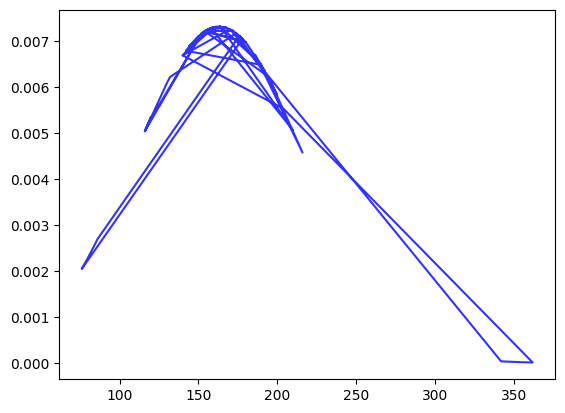

In [28]:
plt.plot(Xs, Ys, 'b', alpha = 0.8)

In [29]:
import scipy.stats as sst

In [30]:
snd = sst.norm(expectation(X['mass']), standard_deviation(X['mass']))

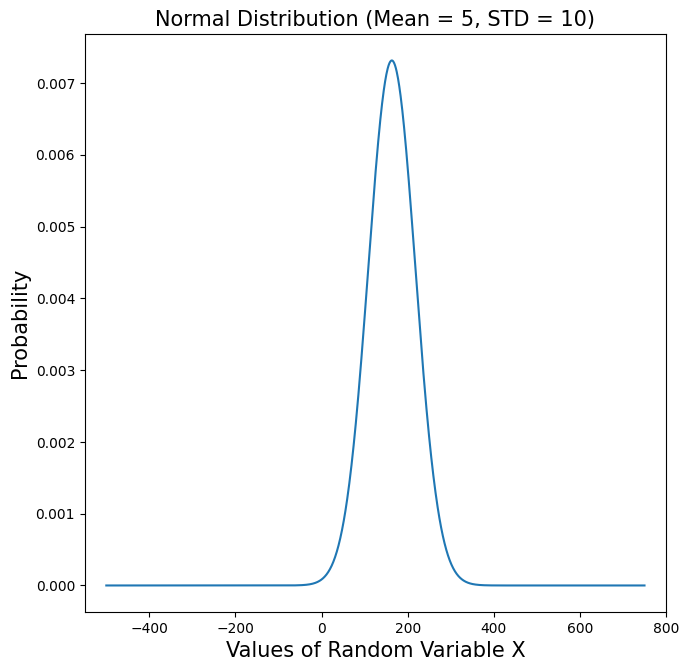

In [31]:
x = np.linspace(-500, 750, 1250)
#
# Plot the standard normal distribution for different values of random variable
# falling in the range -100, 100
#
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-550, 800)
plt.title('Normal Distribution (Mean = 5, STD = 10)', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

In [32]:
standard_normal_distribution(X['mass'])

[0.006356857348833917,
 0.006971322354945257,
 0.007112176576329487,
 0.002692316156257591,
 0.0025546075815217496,
 0.00229070492792853,
 0.00229070492792853,
 0.0020430500359634755,
 0.0070461313584867305,
 0.00721696826171752,
 0.007303060178817657,
 0.00721696826171752,
 0.007211790777506568,
 0.007312300386372758,
 0.007162911947595167,
 0.00725124952574756,
 0.00725124952574756,
 0.007284033924727506,
 0.007311717325342378,
 0.007311717325342378,
 0.00730131334538101,
 0.00725124952574756,
 0.006685121375048562,
 0.007255298168068747,
 3.381557533554852e-05,
 1.4103327444415907e-05,
 9.501574863944786e-06,
 0.005522730640376017,
 0.006685121375048562,
 0.00730131334538101,
 0.00728113035207384,
 0.005055086551511422,
 0.007312300386372758,
 0.006477101261649742,
 0.006785243752417669,
 0.007104807753585192,
 0.00730131334538101,
 0.007211790777506568,
 0.00728113035207384,
 0.006877614602315123,
 0.007211790777506568,
 0.006971322354945257,
 0.007211790777506568,
 0.0062304651277